In [1]:
import numpy as np
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv("/content/drive/MyDrive/BTP2/FL_CLIENT2.csv")
# print(df.to_string())
print(df.to_markdown())

|    |   episode |        m1 |        m2 |        m3 |    t1 |     t2 |     t3 |
|---:|----------:|----------:|----------:|----------:|------:|-------:|-------:|
|  0 |       100 |   140.973 |   139.832 |   140.147 | 16.18 | 16.08  | 16.53  |
|  1 |       100 |   464.69  |   462.974 |   465.248 | 17.6  | 17.8   | 17.78  |
|  2 |       100 |  3118.75  |  3000.6   |  2982.98  | 14.55 | 14.36  | 14.8   |
|  3 |       100 |  2920.84  |  2917.37  |  2900.81  | 16.38 | 16.91  | 17.18  |
|  4 |       100 | 59779.8   | 61192.6   | 60680.3   | 16.15 | 16.55  | 14.15  |
|  5 |       200 |   138.358 |   138.042 |   138.069 | 33.45 | 32.65  | 33.01  |
|  6 |       200 |   451.727 |   449.13  |   456.8   | 35.73 | 36.43  | 35.4   |
|  7 |       200 |  2948.87  |  3005.73  |  2932.64  | 29.63 | 28.43  | 28.21  |
|  8 |       200 |  2879.33  |  2859.7   |  2837.73  | 34.18 | 34.3   | 34.3   |
|  9 |       200 | 58986.4   | 59192.6   | 59147.4   | 29.25 | 29.71  | 28.93  |
| 10 |       300 |   136.512

In [6]:
index = df.columns.to_list()
print(index)

['episode', 'm1', 'm2', 'm3', 't1', 't2', 't3']


In [7]:
print((sum(df.loc[0::5,index[1:4]].to_numpy().transpose())/3).transpose())  # averaging each makespan

[140.31733333 138.15633333 136.83633333 136.358      136.22933333]


In [8]:
episode=list(set(df["episode"]))
episode.sort()
print(episode)

[100, 200, 300, 400, 500]


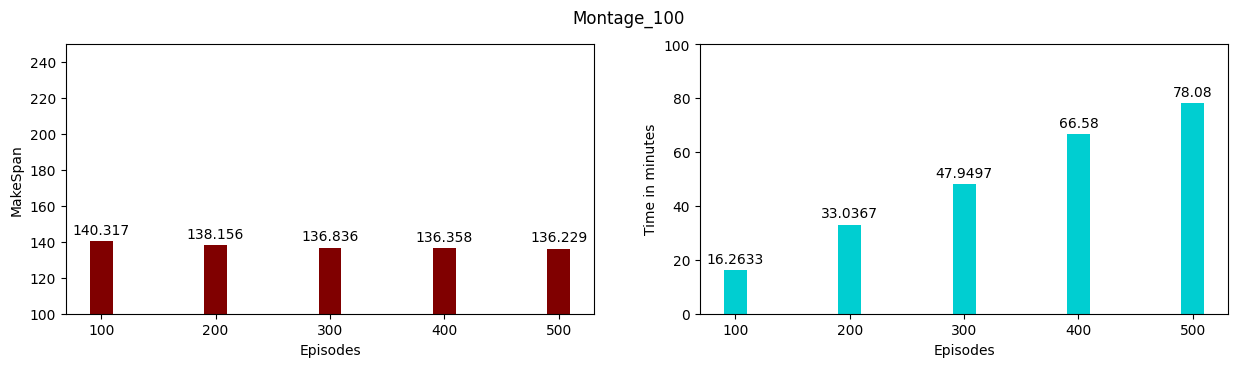

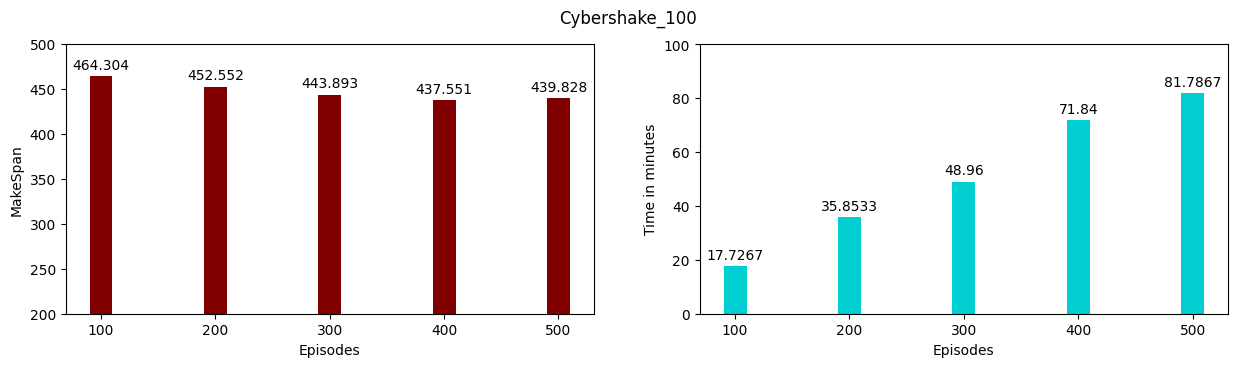

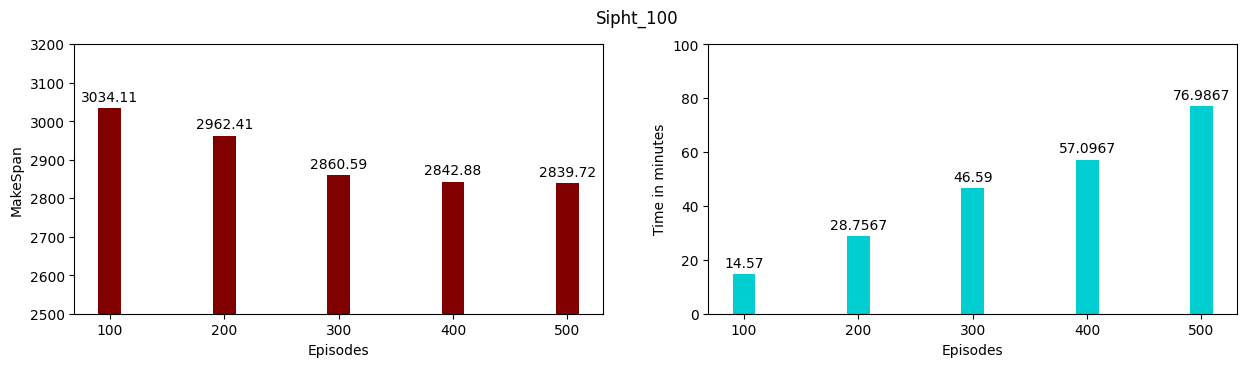

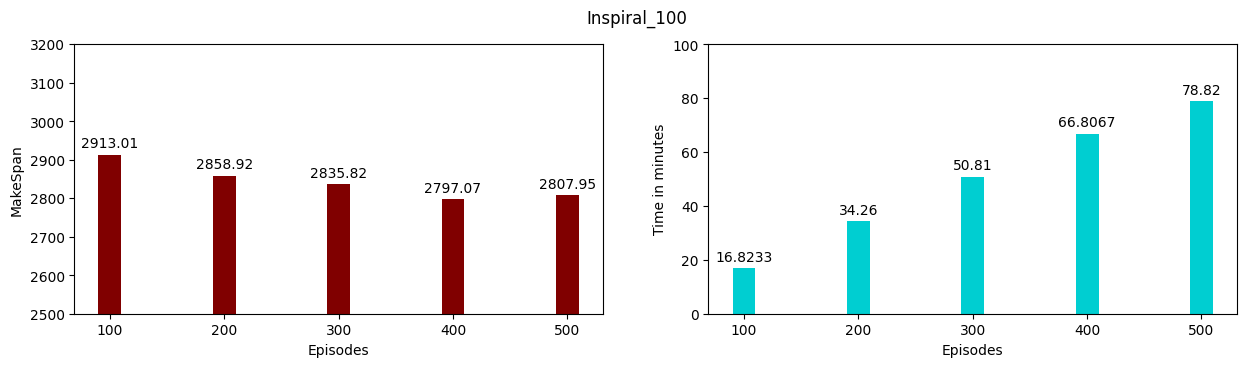

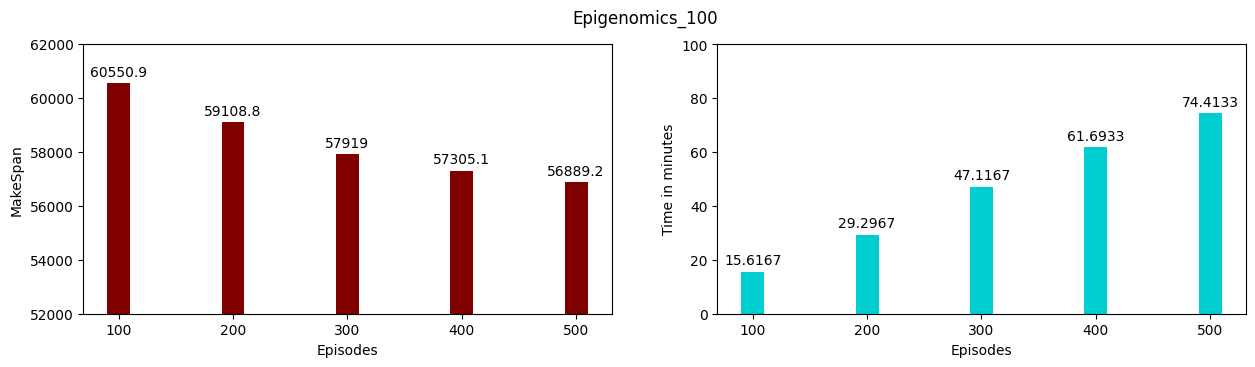

In [9]:
Title = ["Montage_100","Cybershake_100",
        "Sipht_100","Inspiral_100",
        "Epigenomics_100"]
#     plt.title("Total Episode: "+str(episode[i]))
E=[0 for i in range(len(episode))]
T=[0 for i in range(len(episode))]
for i in range(len(Title)):
    plt.figure(figsize=(15,3.5))
    plt.subplots_adjust(wspace=0.2)
    plt.suptitle(Title[i])
    plt.subplot(1,2,1)
    # y1 = (sum(df.loc[i::6,index[1:6]].to_numpy().transpose())/5).transpose()
    y1 = (sum(df.loc[i::5,['m1', 'm2', 'm3']].to_numpy().transpose())/3).transpose()
    for k in range(len(episode)):
      E[k]+=y1[k]
    plt.bar_label(plt.bar(episode,y1,color ='maroon', width = 20),padding=3)
    plt.xlabel("Episodes")
    plt.ylabel("MakeSpan")
    if i==0:
     plt.ylim(100,250)
    elif i==1:
     plt.ylim(200,500)
    elif i==2:
     plt.ylim(2500,3200)
    elif i==3:
     plt.ylim(2500,3200)
    else:
     plt.ylim(52000,62000)

    plt.subplot(1,2,2)
    # y2 = (sum(df.loc[i::6,index[6:11]].to_numpy().transpose())/5).transpose()
    y2 = (sum(df.loc[i::5,['t1', 't2', 't3']].to_numpy().transpose())/3).transpose()
    for k in range(len(episode)):
      T[k]+=y2[k]
    plt.bar_label(plt.bar(episode,y2,color ='darkturquoise', width = 20),padding=3)
    plt.xlabel("Episodes")
    plt.ylabel("Time in minutes")
    plt.ylim(0,100)
    plt.show()


# averaging the value of makespan and time based on the the workflow
for i in range(len(episode)):
    E[i] = round(E[i]/len(Title),2)
    T[i] = round(T[i]/len(Title),2)
print("\n\n")

'\n5.07\n4.94\n4.9\n5.23\n4.74\n'

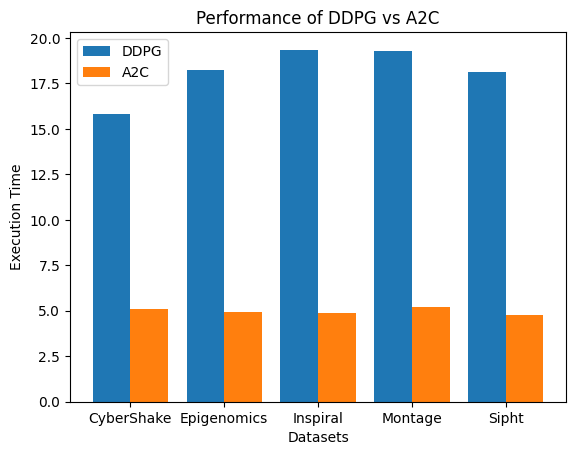

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = ['CyberShake','Epigenomics','Inspiral','Montage','Sipht']
DDPG = [15.82, 18.22, 19.35, 19.26, 18.11]
A2C = [5.07, 4.94, 4.9, 5.23, 4.74]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, DDPG, 0.4, label = 'DDPG')
plt.bar(X_axis + 0.2, A2C, 0.4, label = 'A2C')

plt.xticks(X_axis, X)
plt.xlabel("Datasets")
plt.ylabel("Execution Time")
plt.title("Performance of DDPG vs A2C")
plt.legend()
